<a href="https://colab.research.google.com/github/hufsaim/T10402201/blob/master/notebook/Lab01_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습 1
다음은 세 개의 숫자 1, 2, 3을 가지는 row vector를 정의한 것이다. A, B, C의 차이를 이해하자.

- 다음의 명령어들을 실행해보고, 결과를 이해하자.
  - print(A+B)
  - print(B+A)
  - print(B+C)
  - print(C+B)
  - print(A+C)
  - print(C+A)



In [1]:
A = [1, 2, 3]
print('A=',A)

import numpy as np
B = np.array([1, 2, 3])
print('B=',B)

import torch
C = torch.tensor([1,2,3])
print('C=',C)

A= [1, 2, 3]
B= [1 2 3]
C= tensor([1, 2, 3])


In [2]:
# print(A+B)

## 실습 2
Google drive에 image파일들을 업로드하고 하나의 image파일을 array로 불러오고 matplotlib.pyplot을 이용하여 display해보기.
- google drive를 colab에 연결하기.
- google drive의 image file의 주소를 가져오기.
- image file을 array형태로 가져오기.
- array를 matplotlib로 display하기.


In [3]:
from skimage import io
import matplotlib.pyplot as plt

In [4]:
myimg = '/content/drive/MyDrive/data/hufs_mnist_png/testing3/7/f3_082.png'
I = io.imread(myimg)
print(I.shape)

(64, 64)


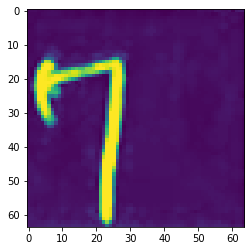

In [5]:
plt.imshow(I)
plt.show()

## 실습 3
Google drive에 있는 image파일들의 list를 생성하여 출력해보자.
- image들을 포함하는 폴더의 주소를 가져오기.
- 폴더 안의 image파일들의 목록을 가져오기.
- 가져온 목록을 출력하고 image파일의 개수를 확인하기.

In [6]:
import glob
import os

In [7]:
myfolder = '/content/drive/MyDrive/data/hufs_mnist_png/testing3/7'
mylist = glob.glob(os.path.join(myfolder,'*.png'))
cn = 0
for myimg in mylist:
  cn=cn+1
  print(f'{cn}: {myimg}')
  if cn>4:
    break

1: /content/drive/MyDrive/data/hufs_mnist_png/testing3/7/f6_110.png
2: /content/drive/MyDrive/data/hufs_mnist_png/testing3/7/f6_111.png
3: /content/drive/MyDrive/data/hufs_mnist_png/testing3/7/f6_106.png
4: /content/drive/MyDrive/data/hufs_mnist_png/testing3/7/f4_061.png
5: /content/drive/MyDrive/data/hufs_mnist_png/testing3/7/f6_113.png


## 실습 4
생성한 list로부터 랜덤하게 N개의 파일들을 불러올 수 있는 data loader를 정의해보자.
- N과 list를 입력으로 하는 generator를 생성하자.
- generator는 image를 같은 크기로 변환하는 과정을 포함하자.
- for loop을 이용해 generator가 제대로 동작하는지 확인하자.


In [8]:
from skimage.transform import resize
from skimage import color
import random

In [9]:
def myimg_iter(batch_size, mylist):
  N = len(mylist)
  inds = list(range(N))
  random.shuffle(inds)

  for i in range(0,N, batch_size):
    batch_inds = inds[i:min(i+batch_size, N)]
    batch_img = np.zeros((len(batch_inds),128,128))
    batch_myfile = []

    for bi in range(0, len(batch_inds)):
      img = io.imread(mylist[batch_inds[bi]])
      if len(img.shape)==3:
        img = resize(img[:,:,0],(128,128))
      else:
        img = resize(img,(128,128))
      batch_img[bi] = img
      batch_myfile.append(mylist[batch_inds[bi]].split('/')[-1])

    yield batch_img, batch_myfile

### 1번째 step ###


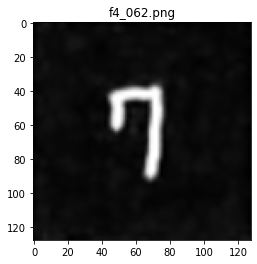

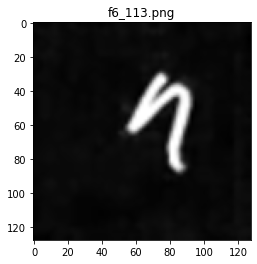

### 2번째 step ###


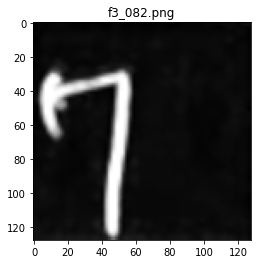

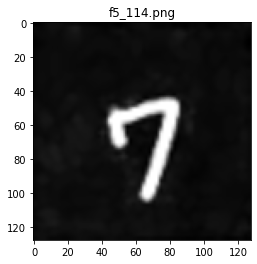

### 3번째 step ###


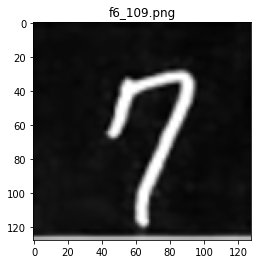

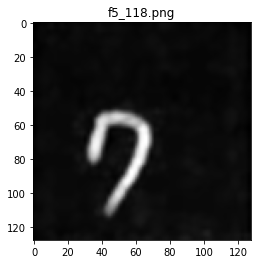

### 4번째 step ###


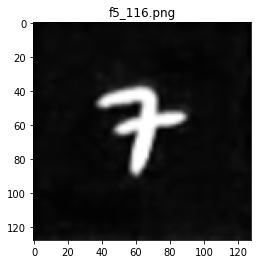

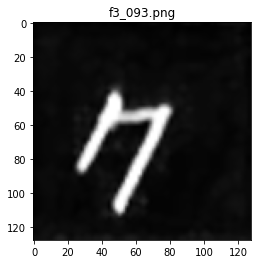

### 5번째 step ###


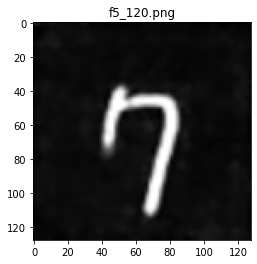

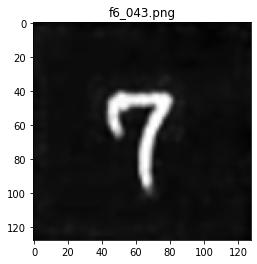

In [10]:
myimage_iter = myimg_iter(2, mylist)
cn = 0
for X, y in myimage_iter:
  cn=cn+1
  print(f'### {cn}번째 step ###')
  for j in range(len(y)):
    plt.imshow(X[j],cmap='gray')
    plt.title(y[j])
    plt.show()
  if cn>4:
    break